<a href="https://colab.research.google.com/github/Jasada7/Multiple-Regression-PM2.5/blob/main/Bank_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# อัปโหลดไฟล์ CSV จากเครื่องคอมพิวเตอร์ขึ้น Google Colab
from google.colab import files
uploaded = files.upload()

Saving Bank Customer Churn Prediction.csv to Bank Customer Churn Prediction.csv


In [56]:
import pandas as pd

# อ่านข้อมูลจากไฟล์ CSV เข้าสู่ DataFrame
data = pd.read_csv("Bank Customer Churn Prediction.csv")

# ดูตัวอย่างข้อมูล
data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [57]:
# จัดเรียงตามคอลัมน์ customer_id จากน้อยไปมาก
df = data.sort_values('customer_id').set_index('customer_id')
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,,,,,,,,,,,
15565701,698,Spain,Female,39,9,161993.89,1,0,0,90212.38,0
15565706,612,Spain,Male,35,1,0.00,1,1,1,83256.26,1
15565714,601,France,Male,47,1,64430.06,2,0,1,96517.97,0
15565779,627,Germany,Female,30,6,57809.32,1,1,0,188258.49,0
15565796,745,Germany,Male,48,10,96048.55,1,1,0,74510.65,0
...,...,...,...,...,...,...,...,...,...,...,...
15815628,711,France,Female,37,8,113899.92,1,0,0,80215.20,0
15815645,481,France,Male,37,8,152303.66,2,1,1,175082.20,0
15815656,541,Germany,Female,39,9,100116.67,1,1,1,199808.10,1


In [58]:
df.dtypes

credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

* customer_id: เลขประจำตัวลูกค้า
* credit_score: คะแนนเครดิตของลูกค้า
* country: ประเทศที่ลูกค้าอาศัยอยู่
* gender: เพศของลูกค้า
* age: อายุของลูกค้า
* tenure: ระยะเวลาที่ลูกค้าใช้บริการ (หน่วยเป็นปี)
* balance: ยอดเงินคงเหลือในบัญชีของลูกค้า
* products_number: จำนวนผลิตภัณฑ์ที่ลูกค้าใช้งาน
* credit_card: ลูกค้ามีบัตรเครดิตหรือไม่ (0 = ไม่มี, 1 = มี)
* active_member: สถานะสมาชิกที่ใช้บริการอยู่หรือไม่ (0 = ไม่ใช่, 1 = ใช่)
* estimated_salary: รายได้ประมาณการของลูกค้า

In [59]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# สร้างช่วงอายุ
age_bins = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 70, 80, 90])
age_labels = ['18-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']

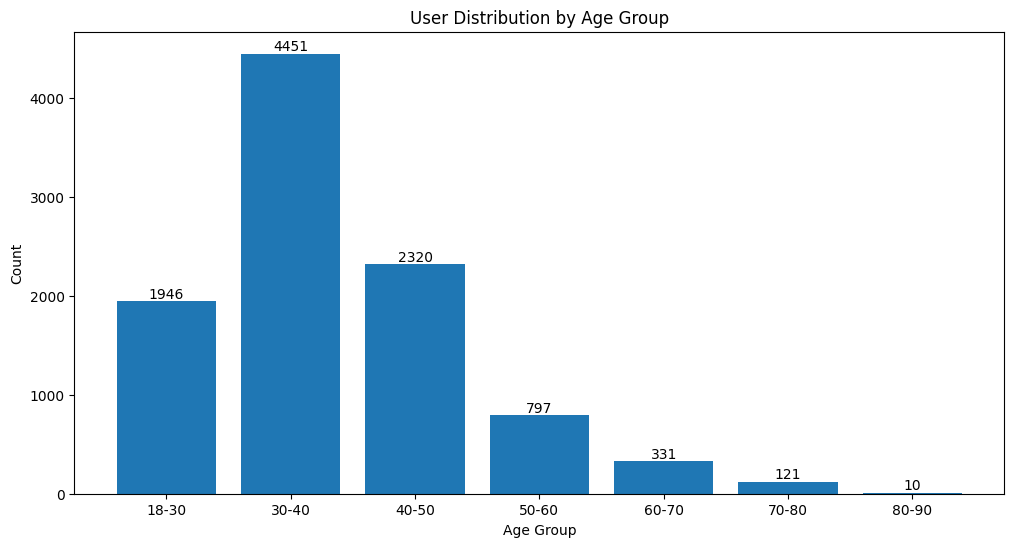

In [61]:
plt.figure(figsize=(12, 6))

# กลุ่มอายุและจำนวนผู้ใช้งานในแต่ละกลุ่ม
age_group_counts = df.groupby(age_bins).size()

# สร้างกราฟแท่ง
plt.bar(age_labels, age_group_counts)

# เพิ่มตัวเลขบนแต่ละแท่ง
for i, count in enumerate(age_group_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# ตกแต่งกราฟ
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('User Distribution by Age Group')

plt.show()

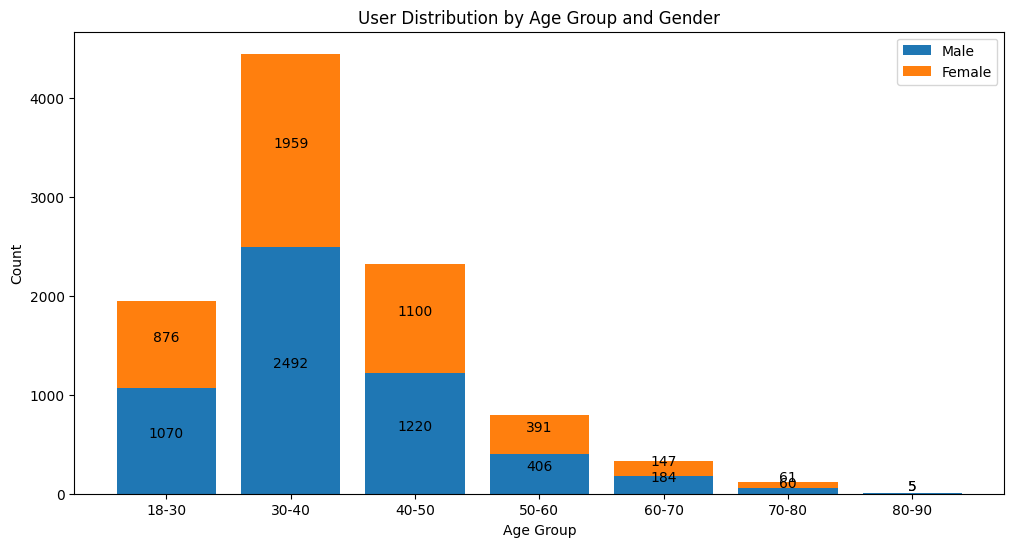

In [62]:
# กลุ่มอายุและจำนวนผู้ใช้งานในแต่ละกลุ่มและเพศ
age_group_gender_counts = df.groupby([age_bins, 'gender']).size().unstack()

plt.figure(figsize=(12, 6))

# สร้างกราฟแท่งสองชั้น (เพศชายและหญิง)
plt.bar(age_labels, age_group_gender_counts['Male'], label='Male')
plt.bar(age_labels, age_group_gender_counts['Female'], bottom=age_group_gender_counts['Male'], label='Female')

# เพิ่มตัวเลขบนแต่ละแท่ง
for i, (male_count, female_count) in enumerate(zip(age_group_gender_counts['Male'], age_group_gender_counts['Female'])):
    plt.text(i, male_count / 2, str(male_count), ha='center', va='bottom')
    plt.text(i, male_count + female_count / 2, str(female_count), ha='center', va='bottom')

# ตกแต่งกราฟ
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('User Distribution by Age Group and Gender')
plt.legend()

plt.show()

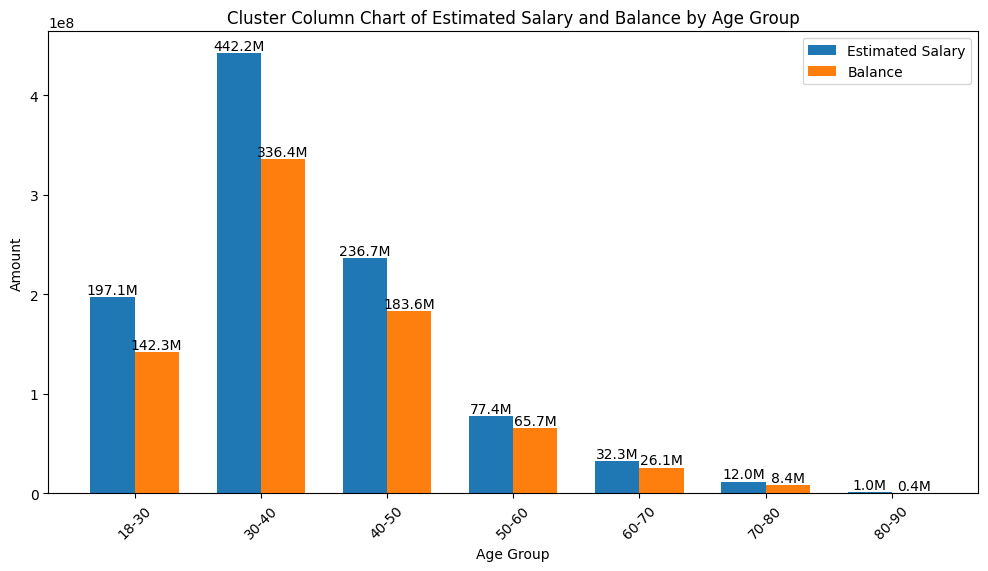

In [63]:
plt.figure(figsize=(12, 6))

# สร้างตัวแปรสำหรับกำหนดตำแหน่งและความกว้างของแต่ละแท่ง
bar_width = 0.35
x = np.arange(len(age_labels))

# กราฟ Cluster Column สำหรับ Estimated Salary
estimated_salary_values = df.groupby(age_bins)['estimated_salary'].sum()
plt.bar(x, estimated_salary_values, width=bar_width, label='Estimated Salary')

# กราฟ Cluster Column สำหรับ Balance
balance_values = df.groupby(age_bins)['balance'].sum()
plt.bar(x + bar_width, balance_values, width=bar_width, label='Balance')

# แสดงตัวเลขบนแต่ละแท่ง (ย่อโดยใช้สัญลักษณ์ "M")
for i, value in enumerate(estimated_salary_values):
    plt.text(i, value, f'{value/1e6:.1f}M', ha='center', va='bottom')
for i, value in enumerate(balance_values):
    plt.text(i + bar_width, value, f'{value/1e6:.1f}M', ha='center', va='bottom')

plt.xlabel('Age Group')
plt.ylabel('Amount')
plt.title('Cluster Column Chart of Estimated Salary and Balance by Age Group')
plt.xticks(x + bar_width/2, age_labels, rotation=45)
plt.legend()

plt.show()

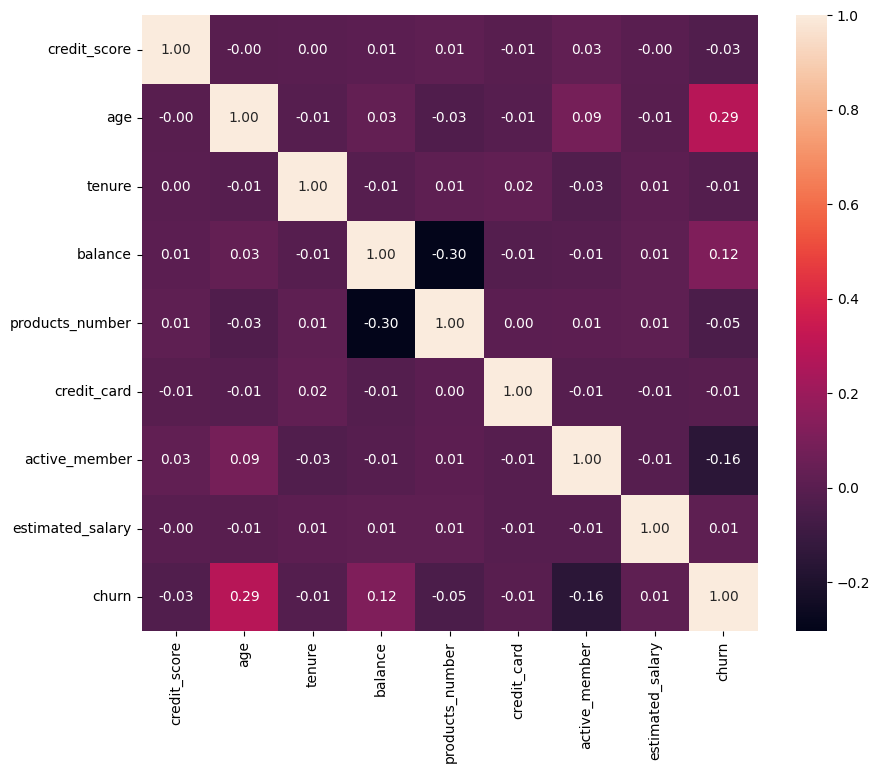

In [111]:
# สร้างตารางที่มีเฉพาะคอลัมน์ที่ต้องการวิเคราะห์
selected_cols = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']
selected_data = df[selected_cols]

# คำนวณค่าสัมพันธ์ของคอลัมน์
corr_matrix = selected_data.corr()

# สร้างกราฟแมทริกซ์การสัมพันธ์ปีรสันต์ (Pearson correlation matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', square=True)

# กำหนดการแสดงผลชื่อคอลัมน์ในแกน x และแกน y
plt.gca().set_xticklabels(selected_cols, rotation=90, ha='center')
plt.gca().set_yticklabels(selected_cols, rotation=0, va='center')

# แสดงกราฟ
plt.show()

# Logistic Regression

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# แบ่งข้อมูลเป็น features (X) และ target (y)
X = df[['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']]
y = df['churn']

# แบ่งชุดข้อมูลเป็น train set และ test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# สร้างและฝึกโมเดล Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# ทำการทดสอบโมเดล
y_pred = model.predict(X_test)

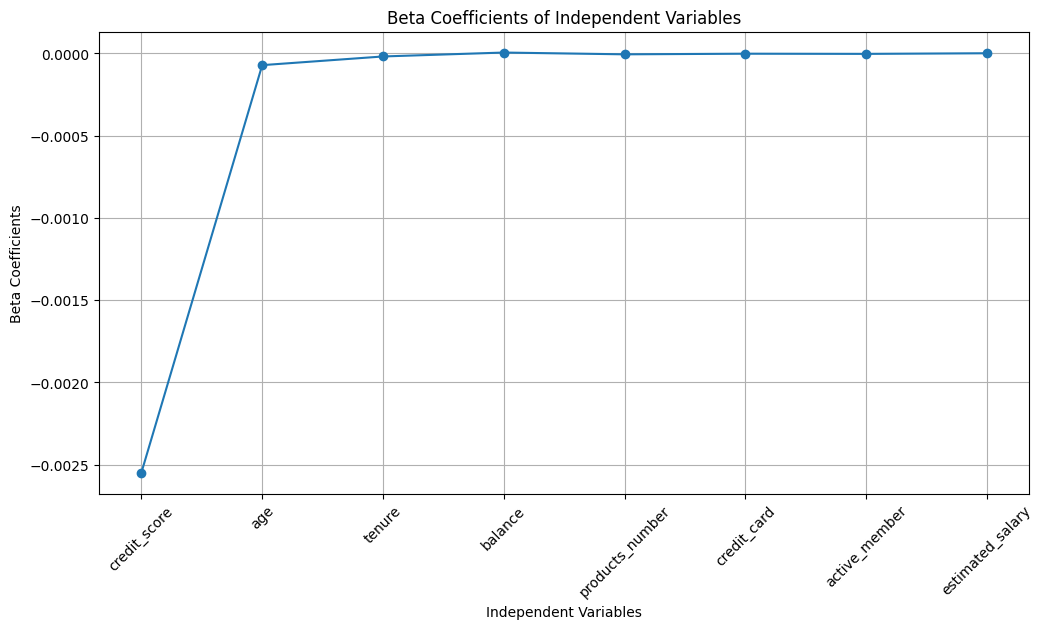

In [114]:
# สร้างชื่อตัวแปรอิสระ
features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']

# ดึงค่า beta coefficients จากโมเดล Logistic Regression
beta_coefficients = model.coef_[0]

# สร้างกราฟ
plt.figure(figsize=(12, 6))
plt.plot(features, beta_coefficients, marker='o')
plt.xlabel('Independent Variables')
plt.ylabel('Beta Coefficients')
plt.title('Beta Coefficients of Independent Variables')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [100]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7000, 8)
(7000,)
(3000, 8)
(3000,)


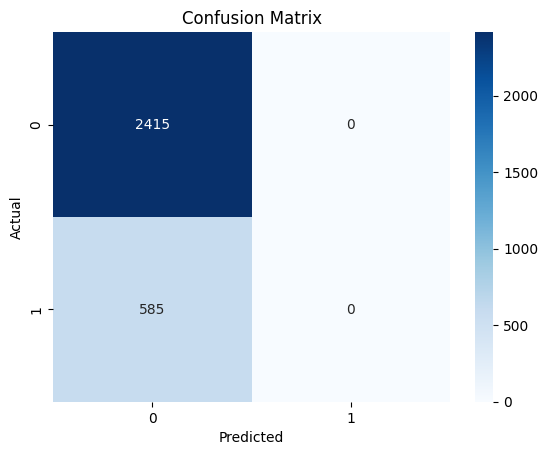

In [107]:
from sklearn.metrics import confusion_matrix

# คำนวณ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# สร้าง Heatmap จาก Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# ตกแต่งกราฟ
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


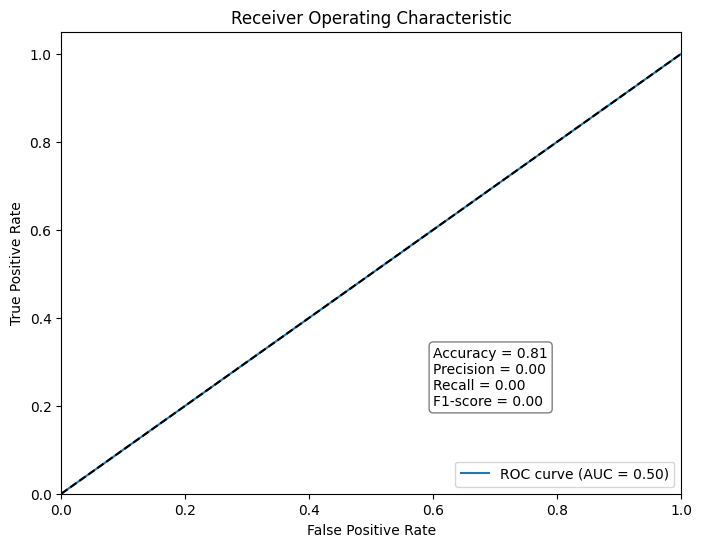

In [110]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

# คำนวณค่า False Positive Rate (FPR), True Positive Rate (TPR), และค่า AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# คำนวณค่า accuracy, precision, recall, F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# พล็อต ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# แสดงค่า accuracy, precision, recall, F1-score บนกราฟ
plt.text(0.6, 0.2, f'Accuracy = {accuracy:.2f}\nPrecision = {precision:.2f}\nRecall = {recall:.2f}\nF1-score = {f1:.2f}',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=0.5))

plt.show()

# Decision tree

In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# สร้างโมเดล Decision Tree
Decision_model = DecisionTreeClassifier()

# ฝึกโมเดล Decision Tree ด้วยชุดข้อมูลฝึก
Decision_model.fit(X_train, y_train)

# ทำนายผลลัพธ์สถานะการเลิกใช้บริการ (churn) ด้วยชุดข้อมูลทดสอบ
Decision_y_pred = Decision_model.predict(X_test)

# คำนวณค่าความแม่นยำของโมเดล
accuracy = accuracy_score(y_test, Decision_y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.78


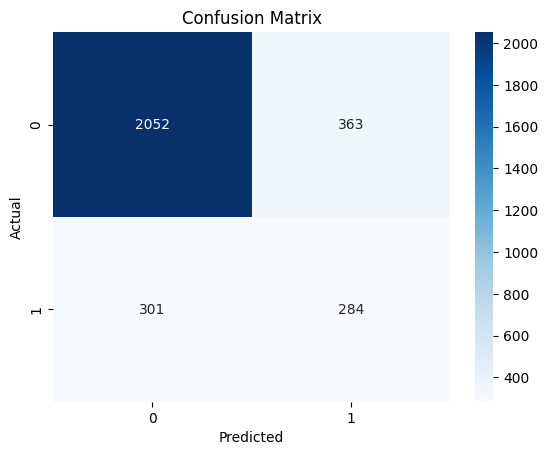

In [132]:
# คำนวณ Confusion Matrix
cm = confusion_matrix(y_test, Decision_y_pred)

# สร้าง Heatmap จาก Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# ตกแต่งกราฟ
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

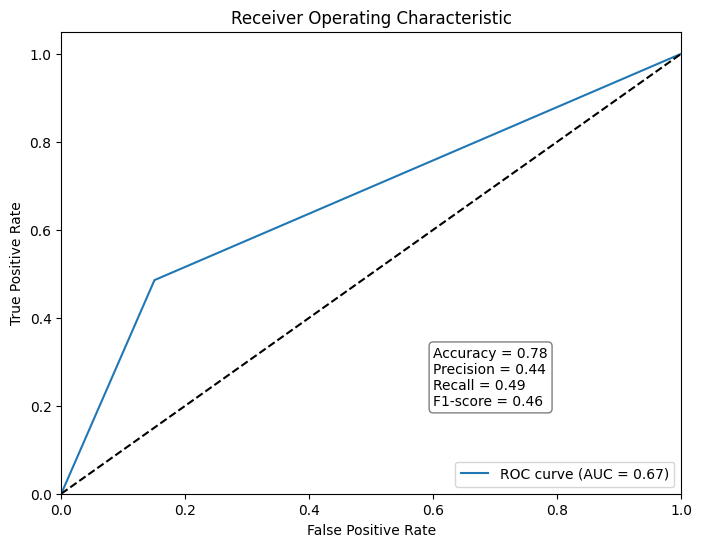

In [138]:
# คำนวณค่า False Positive Rate (FPR), True Positive Rate (TPR), และค่า AUC
fpr, tpr, thresholds = roc_curve(y_test, Decision_y_pred)
roc_auc = auc(fpr, tpr)

# คำนวณค่า accuracy, precision, recall, F1-score
accuracy = accuracy_score(y_test, Decision_y_pred)
precision = precision_score(y_test, Decision_y_pred)
recall = recall_score(y_test, Decision_y_pred)
f1 = f1_score(y_test, Decision_y_pred)

# พล็อต ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# แสดงค่า accuracy, precision, recall, F1-score บนกราฟ
plt.text(0.6, 0.2, f'Accuracy = {accuracy:.2f}\nPrecision = {precision:.2f}\nRecall = {recall:.2f}\nF1-score = {f1:.2f}',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=0.5))

plt.show()

# SVM (Support Vector Machine)

In [131]:
from sklearn.svm import SVC

# สร้างและฝึกโมเดล SVM
SVC_model = SVC()
SVC_model.fit(X_train, y_train)

# ทำการทดสอบโมเดล
SVC_y_pred = SVC_model.predict(X_test)

# คำนวณค่าความแม่นยำของโมเดล
accuracy = accuracy_score(y_test, SVC_y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


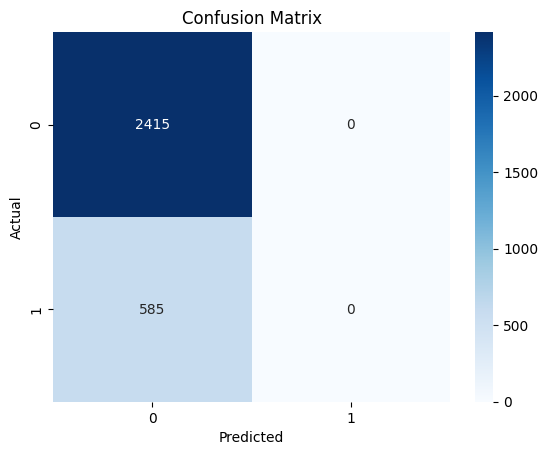

In [133]:
# คำนวณ Confusion Matrix
cm = confusion_matrix(y_test, SVC_y_pred)

# สร้าง Heatmap จาก Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# ตกแต่งกราฟ
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


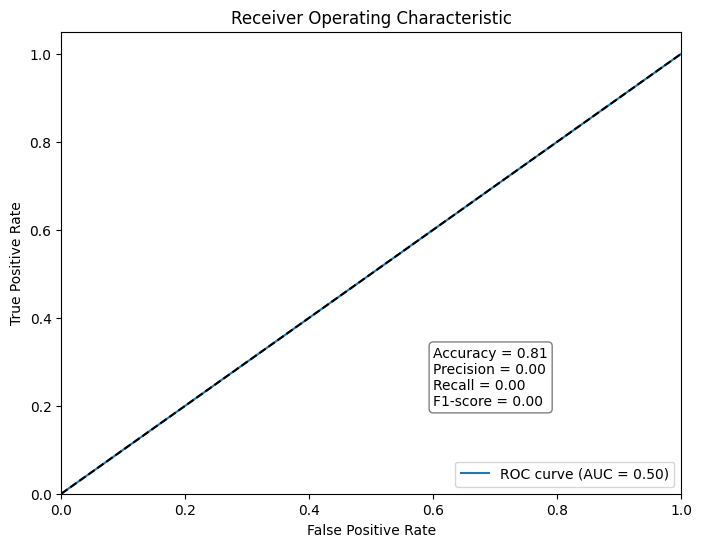

In [136]:
# คำนวณค่า False Positive Rate (FPR), True Positive Rate (TPR), และค่า AUC
fpr, tpr, thresholds = roc_curve(y_test, SVC_y_pred)
roc_auc = auc(fpr, tpr)

# คำนวณค่า accuracy, precision, recall, F1-score
accuracy = accuracy_score(y_test, SVC_y_pred)
precision = precision_score(y_test, SVC_y_pred)
recall = recall_score(y_test, SVC_y_pred)
f1 = f1_score(y_test, SVC_y_pred)

# พล็อต ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# แสดงค่า accuracy, precision, recall, F1-score บนกราฟ
plt.text(0.6, 0.2, f'Accuracy = {accuracy:.2f}\nPrecision = {precision:.2f}\nRecall = {recall:.2f}\nF1-score = {f1:.2f}',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=0.5))

plt.show()